# Classification Models - Basic ML Models

Classification is a task that requires the usage of Machine Learning (ML) algorithms that learn how to assign a class label to examples from the problem domain. Examples:
- classify if a message is spam or not
- given a handwritten character, classify it as one of the known characters

READ MORE: [Classification with Machine Learning](https://www.edureka.co/blog/classification-in-machine-learning/)

**TASK:** Try some ML classification models for popular task: classify a passenger as surviver (or not) of Titanic catastophe 

1. Titanic classification with few popular ML models.
2. Iris classification 

**TO DO:** Read and understand following code. Run the cells, analyse the results and if everything is clear, follow the instructions concerning exercises part.

In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# ML methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# 1. Titanic classification



## 1.1 Load and summarize your data


In [ ]:
#Load the data
titanic = sns.load_dataset('titanic')
#Print the first 10 rows of data
titanic.head(10)

where...

**pclass:** A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

**embarked** Port of Embarkation
C = Cherbourg, Q = Queenstown, S = Southampton

The detailed explanation of meaning of columns can be found here: [Kaggle Titanic](https://www.kaggle.com/c/titanic/data)

In [ ]:
#Count the number of rows and columns in the data set 
titanic.shape


Show the data as a DataFrame table.

In [ ]:
titanic.describe()

In [ ]:
#Get a count of the number of survivors  
titanic['survived'].value_counts()

## 1.2. Visualize your data

In [ ]:
#Visualize the count of number of survivors
sns.countplot(titanic['survived'],label="Count")

In [ ]:
# Visualize the count of survivors for columns 'who', 'sex', 'pclass', 'sibsp', 'parch', and 'embarked'
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12,7))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(titanic[cols[i]], hue=titanic["survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right') 
        
plt.tight_layout()   #tight_layout

In [ ]:
#Look at survival rate by sex and class
titanic.pivot_table('survived', index='sex', columns='class')

In [ ]:
#Plot the survival rate of each class.
sns.barplot(x='class', y='survived', data=titanic)

In [ ]:
#Look at survival rate by sex, age and class
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

## 1.3. Preparing data

Typical data pre-processing for Machine Learning task may indclude following steps:

- Handling missing data (eliminating/estimating missing data)
- Dealing with unbalanced classes
- Feature encoding
- Feature scaling (normalization/standardization)
- Extract independent values
- Test / Validation Split


### Handing missing data 

Check which columns contain empty values (NaN, NAN, na). Looks like columns age, embarked, deck, and embarked_town are missing some values.

All the other columns are not missing any values.

In [ ]:
#Count the empty (NaN, NAN, na) values in each column 
titanic.isna().sum()

Next, lets drop the redundant columns that are non-numerical and remove rows with missing values.

In [ ]:
# Drop the columns
try:
    titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'alone', 'adult_male', 'who'], axis=1)
except KeyError:
    print("Haven't you already run this cell? Redundant columns are already removed!")

#Remove the rows with missing values
titanic = titanic.dropna(subset =['embarked', 'age'])

In [ ]:
#Count the NEW number of rows and columns in the data set
titanic.shape

In [ ]:
titanic


### Feature encoding



In [ ]:
titanic.dtypes

In [ ]:
#Print the unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

Change the non-numeric data to numeric data, and print the new values.

In [ ]:
#Encoding categorical data values (Transforming object data types to integers)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode sex column
titanic.iloc[:,2]= labelencoder.fit_transform(titanic.iloc[:,2].values)
#print(labelencoder.fit_transform(titanic.iloc[:,2].values))

#Encode embarked
titanic.iloc[:,7]= labelencoder.fit_transform(titanic.iloc[:,7].values)
#print(labelencoder.fit_transform(titanic.iloc[:,7].values))

#Print the NEW unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

### Extract dependent/independent values

In [ ]:
#Split the data into independent 'X' and dependent 'Y' variables
X = titanic.iloc[:, 1:8].values # all columns
Y = titanic.iloc[:, 0].values # survived column



In [ ]:
Y

### Test / Validation Split

- x_train – features for the training data
- x_test – features for the test data
- y_train – labels for training data
- y_test – labels for testing data


train_test_split() method can handle both: numpy arrays or DataFrames:

In [ ]:
# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
print("Features (independent variables):")
print(X_train)

In [ ]:
print("Corresponding labels (dependent variables):")
print(Y_train)

## 1.4. Building models 



### Build Models


Let’s test 6 different algorithms (models):

- Logistic Regression (LR)
- K Nearest Neighbor (KNN)
- Support Vector Machine (SVM)
- Gaussian Naive Bayes (NB)
- Decision Tree Classifier 
- Random Forest Classifier 
  

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

In [ ]:
model = []
model.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
model.append(('KNN', KNeighborsClassifier()))
model.append(('SVM', SVC(gamma='auto')))
model.append(('NB', GaussianNB()))
model.append(('DT', DecisionTreeClassifier()))
model.append(('RF', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)))




In [ ]:
for nm, mdl in model:
    mdl.fit(X_train, Y_train)
    print(nm, mdl.score(X_train, Y_train))

## 1.5. Select the best model 

We now have 6 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

The model that was most accurate on the train data is the Logistic Regression Model with an accuracy of 80.32%.

Lets test the models with testing data.

In [ ]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns

for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i][1].predict(X_test)) 
    #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i][1].predict(X_test)).ravel()
    #print(cm)
    plt.figure()  
    p = sns.heatmap(cm, annot=True)
    title = f'Mode {model[i][0]} Testing Accuracy = "{(TP + TN) / (TP + TN + FN + FP)} !"'
    p.set_title(title)
    

Random Forest Classifier did second-best on the training and testing data and has an accuracy of 80.41% on the testing data and 97.53% on the training data.

Now we can get the important features.

In [ ]:
#Get the importance of the features
forest = model[5][1]
importances = pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

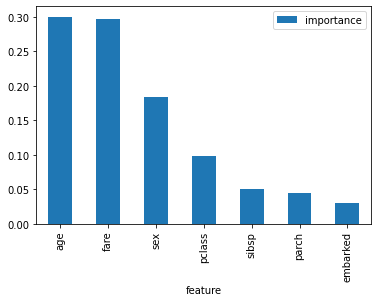

In [ ]:
#Visualize the importance
importances.plot.bar()

## 1.7. Algorithm Tuning

Grid search is a process that searches exhaustively through a manually specified subset of the hyperparameter space of the targeted algorithm. Random search, on the other hand, selects a value for each hyperparameter independently using a probability distribution.

Lets try to tune the RandomForest model with using of both methods.

### Grid Search

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

from sklearn.ensemble import RandomForestClassifier
rf_Model = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
rf_Grid.fit(X_train, Y_train)

In [ ]:
best_params = rf_Grid.best_params_
best_params

In [ ]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,Y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,Y_test):.3f}')

**Note**: Why default hyperparameters gave better results than those calculated with Grid Search?

Because grid search creates subsamples of the data repeatedly. That means the model is trained on 80% of x_train in each iteration and the results are the mean of predictions on the other 20%. Read more: 

### Random Search

In [ ]:
rf_Model = RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 3, verbose=2, n_jobs = 4)

rf_RandomGrid.fit(X_train, Y_train)


In [ ]:
best_params_rand = rf_RandomGrid.best_params_
best_params_rand

In [ ]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,Y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,Y_test):.3f}')

### Exercise

1. Try to experiment with above example - change ranges? Are you able to improve the accuracy?

2. We could also perform this procedure for all models. In order to prepare parameters for tuning you may read about models implementation in scikit-learn documentation. Look at [KNeighborsClassifier]('https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) and try to tune this algorithm using Grid Search or Random Search method in order to obtain better results!

In [ ]:
### YOUR CODE

## 1.8. Make and evaluate predictions

We can fit the model on the entire training dataset and make predictions on the validation dataset.


In [ ]:
final_model = RandomForestClassifier(**best_params) 
final_model.fit(X_train, Y_train)
print(final_model.score(X_train, Y_train))
final_predictions = final_model.predict(X_test)
#final_model.classes_


### Make predictions on a custom sample


In it, I will have a pclass = 3, meaning I would probably be in the third class because of the cheaper price.
I am a female, so sex = 0.
I'm 28.
Most likely, I would not be on the ship with siblings or spouses, so sibsp = 0.
Nor with any children or parents, so parch = 0.
I would try to pay the minimum fare, so fare = 0.
I would’ve embarked from Queenstown, so embarked = 1

In [ ]:
my_survival_d = {'pclass':1, 
               'sex': 0, 
               'age':28, 
               'sibsp':0, 
               'parch':1, 
               'fare': 91.2833, 
               'embarked': 1}

my_survival = [[*my_survival_d.values()]]


my_models = [mdl for nm, mdl in model] + [final_model]

#print(my_survival)
#Print Prediction of your model
for mod in my_models:
    pred = mod.predict(my_survival)
    print(pred)
    print(f'Due to {mod} prediction:')
    if pred == 0:
        print('Oh no! You are dead!')
    else:
        print('You survived')
    print()


### **Exercise**

Put your values into ``` my_survival_d ```
and find out if you would have had survided in the disaster or not due to all our prepared models. You can play with other values. Are you satisfied with the results?
